In [1]:
# https://huggingface.co/docs/timm/quickstart
# https://towardsdatascience.com/getting-started-with-pytorch-image-models-timm-a-practitioners-guide-4e77b4bf9055

In [1]:
import torch
import numpy as np 

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print(device)

cuda:0


In [2]:
# import package

# model
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
from torch import optim
from torch.optim.lr_scheduler import StepLR

# dataset and transformation
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import os
from torchvision import models
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torch.utils.data import Subset

# display images
from torchvision import utils
import matplotlib.pyplot as plt
%matplotlib inline


# utils
import numpy as np
from torchsummary import summary
import time
import copy

import os
from tqdm.notebook import tqdm
from warnings import filterwarnings
filterwarnings('ignore')

import torch
from torch import nn, optim
from torch.backends import cudnn
cudnn.benchmark = True
from randaugment import RandAugment, ImageNetPolicy
from torch.autograd import Variable


import timm
from timm.data.transforms_factory import create_transform
from timm.data.dataset_factory import create_dataset
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 예시로 'NanumGothic'을 사용

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
timm.list_models()

['bat_resnext26ts',
 'beit_base_patch16_224',
 'beit_base_patch16_384',
 'beit_large_patch16_224',
 'beit_large_patch16_384',
 'beit_large_patch16_512',
 'beitv2_base_patch16_224',
 'beitv2_large_patch16_224',
 'botnet26t_256',
 'botnet50ts_256',
 'caformer_b36',
 'caformer_m36',
 'caformer_s18',
 'caformer_s36',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_medium',
 'coat_lite_medium_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_small',
 'coat_tiny',
 'coatnet_0_224',
 'coatnet_0_rw_224',
 'coatnet_1_224',
 'coatnet_1_rw_224',
 'coatnet_2_224',
 'coatnet_2_rw_224',
 'coatnet_3_224',
 'coatnet_3_rw_224',
 'coatnet_4_224',
 'coatnet_5_224',
 'coatnet_bn_0_rw_224',
 'coatnet_nano_cc_224',
 'coatnet_nano_rw_224',
 'coatnet_pico_rw_224',
 'coatnet_rmlp_0_rw_224',
 'coatnet_rmlp_1_rw2_224',
 'coatnet_rmlp_1_r

In [4]:
timm.list_modules()

['beit',
 'byoanet',
 'byobnet',
 'cait',
 'coat',
 'convit',
 'convmixer',
 'convnext',
 'crossvit',
 'cspnet',
 'davit',
 'deit',
 'densenet',
 'dla',
 'dpn',
 'edgenext',
 'efficientformer',
 'efficientformer_v2',
 'efficientnet',
 'efficientvit_mit',
 'efficientvit_msra',
 'eva',
 'fastvit',
 'focalnet',
 'gcvit',
 'ghostnet',
 'hardcorenas',
 'hrnet',
 'inception_next',
 'inception_resnet_v2',
 'inception_v3',
 'inception_v4',
 'levit',
 'maxxvit',
 'metaformer',
 'mlp_mixer',
 'mobilenetv3',
 'mobilevit',
 'mvitv2',
 'nasnet',
 'nest',
 'nfnet',
 'pit',
 'pnasnet',
 'pvt_v2',
 'regnet',
 'repghost',
 'repvit',
 'res2net',
 'resnest',
 'resnet',
 'resnetv2',
 'rexnet',
 'selecsls',
 'senet',
 'sequencer',
 'sknet',
 'swin_transformer',
 'swin_transformer_v2',
 'swin_transformer_v2_cr',
 'tiny_vit',
 'tnt',
 'tresnet',
 'twins',
 'vgg',
 'visformer',
 'vision_transformer',
 'vision_transformer_hybrid',
 'vision_transformer_relpos',
 'vision_transformer_sam',
 'volo',
 'vovnet',
 'x

In [5]:
tfm = create_transform(224, is_training=True, auto_augment='rand-m6-mstd0.5', mean =[0.49623227595753333,0.48377202969644434,0.39612923273387035], std=[0.21602388510121484,0.2127661699292398,0.2127661699292398] )

train_ds = create_dataset(name= '', root='../../data/image_dataset/train_image_dataset', transform = tfm)
val_ds = create_dataset(name= '', root='../../data/image_dataset/test_image_dataset', transform = create_transform(224))

# create DataLoader
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True, num_workers=6)
val_dl = DataLoader(val_ds, batch_size=32, shuffle=False, num_workers=6)

In [7]:
def display_images():
    fig, subplots = plt.subplots(1,5, figsize=(13,6))
    for i in range(5):
        axil = subplots.flat[i]
        original_img = Image.fromarray(cifar10.data[i])
        axil.imshow(original_img)
        axil.set_title('original_img')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


image indices: [ 235 5192  905 7813]


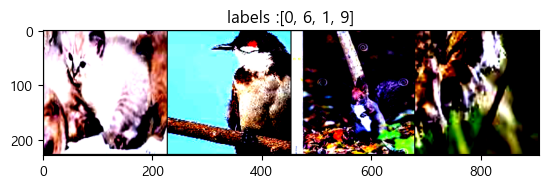

In [8]:
# display sample images 
def show(img, y=None, color=True):
    npimg = img.numpy()
    npimg_tr = np.transpose(npimg, (1,2,0))
    plt.imshow(npimg_tr)

    if y is not None:
        plt.title('labels :' + str(y))

np.random.seed(1)
torch.manual_seed(1)

grid_size = 4
rnd_inds = np.random.randint(0, len(train_ds), grid_size)
print('image indices:',rnd_inds)

x_grid = [train_ds[i][0] for i in rnd_inds]
y_grid = [train_ds[i][1] for i in rnd_inds]

x_grid = utils.make_grid(x_grid, nrow=grid_size, padding=2)

show(x_grid, y_grid)

In [9]:
model = timm.create_model('resnext101_32x4d', pretrained=True, num_classes=13)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

summary(model, (3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5          [-1, 128, 56, 56]           8,192
       BatchNorm2d-6          [-1, 128, 56, 56]             256
              ReLU-7          [-1, 128, 56, 56]               0
            Conv2d-8          [-1, 128, 56, 56]           4,608
       BatchNorm2d-9          [-1, 128, 56, 56]             256
         Identity-10          [-1, 128, 56, 56]               0
             ReLU-11          [-1, 128, 56, 56]               0
         Identity-12          [-1, 128, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]          32,768
      BatchNorm2d-14          [-1, 256,

In [10]:
loss_func = nn.CrossEntropyLoss(reduction='sum')
opt = optim.Adam(model.parameters(), lr=0.001)

from torch.optim.lr_scheduler import ReduceLROnPlateau
# lr_scheduler = ReduceLROnPlateau(opt, mode='min', factor=0.5, patience=3)
lr_scheduler = StepLR(opt, step_size=1, gamma=0.8)

In [11]:
# function to get current lr
def get_lr(opt):
    for param_group in opt.param_groups:
        return param_group['lr']
    
# function to calculate metric per mini-batch
def metric_batch(output, target):
    pred = output.argmax(1, keepdim=True)
    corrects = pred.eq(target.view_as(pred)).sum().item()
    return corrects

# function to calculate loss per mini-batch
def loss_batch(loss_func, output, target, opt=None):
    loss = loss_func(output, target)
    metric_b = metric_batch(output, target)

    if opt is not None:
        opt.zero_grad()
        loss.backward()
        opt.step()

    return loss.item(), metric_b

def loss_epoch(model, loss_func, dataset_dl, sanity_check=False, opt=None):
    running_loss = 0.0
    running_metric = 0.0
    len_data = len(dataset_dl.dataset)

    for xb, yb in dataset_dl:

        xb = xb.to(device)
        yb = yb.to(device)
        output = model(xb)

        loss_b, metric_b = loss_batch(loss_func, output, yb, opt)

        running_loss += loss_b

        if metric_b is not None:
            running_metric += metric_b

        if sanity_check is True:
            break

    loss = running_loss / len_data
    metric = running_metric / len_data

    return loss, metric

In [12]:
class LabelSmoothingLoss(nn.Module):
    def __init__(self, classes, smoothing=0.1, dim=-1):
        super(LabelSmoothingLoss, self).__init__()
        self.confidence = 1.0 - smoothing
        self.smoothing = smoothing
        self.cls = classes
        self.dim = dim

    def forward(self, pred, target):
        pred = pred.log_softmax(dim=self.dim)
        with torch.no_grad():
            true_dist = torch.zeros_like(pred)
            true_dist.fill_(self.smoothing / (self.cls - 1))
            true_dist.scatter_(1, target.data.unsqueeze(1), self.confidence)

        return torch.mean(torch.sum(-true_dist * pred, dim=self.dim))

In [13]:
# function to start training
def train_val(model, params):
    num_epochs=params['num_epochs']
    loss_func=params["loss_func"]
    opt=params["optimizer"]
    train_dl=params["train_dl"]
    val_dl=params["val_dl"]
    sanity_check=params["sanity_check"]
    lr_scheduler=params["lr_scheduler"]
    path2weights=params["path2weights"]

    loss_history = {'train': [], 'val': []}
    metric_history = {'train': [], 'val': []}

    # # GPU out of memoty error
    # best_model_wts = copy.deepcopy(model.state_dict())

    best_loss = float('inf')

    start_time = time.time()

    for epoch in range(num_epochs):
        current_lr = get_lr(opt)
        print('Epoch {}/{}, current lr={}'.format(epoch, num_epochs-1, current_lr))

        model.train()
        train_loss, train_metric = loss_epoch(model, loss_func, train_dl, sanity_check, opt)
        loss_history['train'].append(train_loss)
        metric_history['train'].append(train_metric)

        model.eval()
        with torch.no_grad():
            val_loss, val_metric = loss_epoch(model, loss_func, val_dl, sanity_check)
        loss_history['val'].append(val_loss)
        metric_history['val'].append(val_metric)

        if val_loss < best_loss:
            best_loss = val_loss
            # best_model_wts = copy.deepcopy(model.state_dict())

            torch.save(model.state_dict(), path2weights)
            print('Copied best model weights!')
            print('Get best val_loss')

        # lr_scheduler.step(val_loss)
        lr_scheduler.step()
        print('train loss: %.6f, val loss: %.6f, accuracy: %.2f, time: %.4f min' %(train_loss, val_loss, 100*val_metric, (time.time()-start_time)/60))
        print('-'*10)

    # model.load_state_dict(best_model_wts)

    return model, loss_history, metric_history

In [14]:
# definc the training parameters
params_train = {
    'num_epochs':10,
    'optimizer':opt,
    'loss_func':LabelSmoothingLoss(classes=42, smoothing=0.1),
    'train_dl':train_dl,
    'val_dl':val_dl,
    'sanity_check':False,
    'lr_scheduler':lr_scheduler,
    'path2weights':'../../weight/test.pth',
}

# create the directory that stores weights.pt
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSerror:
        print('Error')
createFolder('./models')

In [ ]:
model, loss_hist, metric_hist = train_val(model, params_train)

Epoch 0/9, current lr=0.001


In [31]:
# 테스트 데이터셋에 대한 모델의 정확도를 계산하는 함수
def evaluate_model(model, test_loader):
    model.eval()  # 모델을 평가 모드로 설정
    running_corrects = 0

    # 기울기 계산을 비활성화

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)

    # 전체 정확도 계산
    accuracy = running_corrects.double() / len(test_loader.dataset)
    print(f'Test Accuracy: {accuracy:.4f}')

# 테스트 데이터셋을 사용하여 모델 평가
evaluate_model(model, val_dl)

Test Accuracy: 0.9845


In [32]:
# 테스트 데이터셋에 대한 모델의 클래스별 정확도를 계산하는 함수
def evaluate_model_per_class(model, test_loader, num_classes):
    model.eval()  # 모델을 평가 모드로 설정
    class_correct = [0 for _ in range(num_classes)]
    class_total = [0 for _ in range(num_classes)]

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for label, prediction in zip(labels, preds):
                if label == prediction:
                    class_correct[label] += 1
                class_total[label] += 1

    for i in range(num_classes):
        if class_total[i] == 0:
            print(f'Accuracy of class {i} : N/A (No samples in test set)')
        else:
            accuracy = 100 * class_correct[i] / class_total[i]
            print(f'Accuracy of class {i} : {accuracy:.2f}% ({class_correct[i]}/{class_total[i]})')

# 테스트 데이터셋을 사용하여 클래스별 모델 평가
evaluate_model_per_class(model, val_dl, 13)

Accuracy of class 0 : 98.90% (902/912)
Accuracy of class 1 : 97.41% (301/309)
Accuracy of class 2 : 98.05% (251/256)
Accuracy of class 3 : 99.39% (325/327)
Accuracy of class 4 : 99.10% (331/334)
Accuracy of class 5 : 98.70% (227/230)
Accuracy of class 6 : 99.54% (215/216)
Accuracy of class 7 : 98.88% (265/268)
Accuracy of class 8 : 95.57% (194/203)
Accuracy of class 9 : 98.13% (262/267)
Accuracy of class 10 : 97.49% (194/199)
Accuracy of class 11 : 98.72% (231/234)
Accuracy of class 12 : 97.86% (229/234)
